In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

rolling_period = 20

def read_system_json(algo, env, scenario, env_n, seed):
    seed = f"seed_{seed}"
    path = f"../results/json/{algo}/{env}/{scenario}/envs_{env_n}/{seed}/"
    try:
        with open(path + "metrics.json", "r") as f:
            data = json.load(f)
    except:
        print(f"Failed to read {path}")
        return None

    data = data[env][scenario][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    if len(df) == 0: return None
    # TODO: this method provides a lagging rolling mean, I need to change it to provide a RT mean
    df[f"rolling_20"] = df["mean_episode_returns"].rolling(20, min_periods=1).mean()
    df[f"rolling_10"] = df["mean_episode_returns"].rolling(10, min_periods=1).mean()
    
    return df

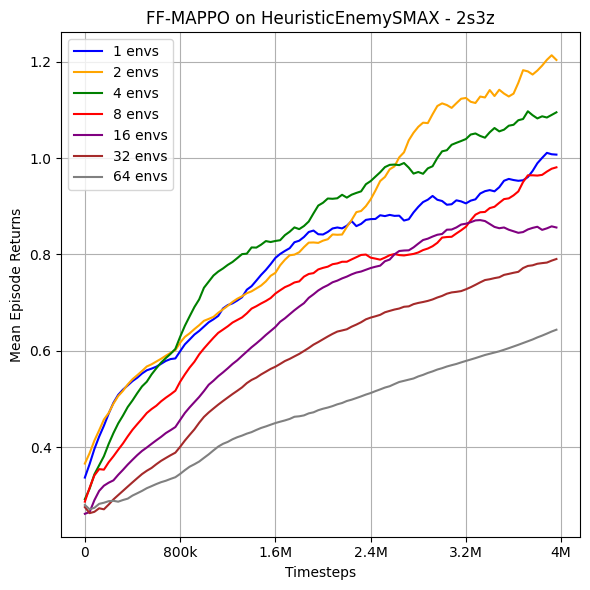

In [25]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32, 64]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

fig = plt.figure(figsize=(6, 6))
ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo", env, scenario, env_n, seed)
        # df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)

        if df is None: continue
        
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"{env_n} envs", ax=ax, color=colors[i])

        i += 1

ax.grid(True)
plt.title(f"FF-MAPPO on {env} - {scenario}")
plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Returns")
plt.xticks([0, 20, 40, 60, 80, 100], ["0", "800k", "1.6M", "2.4M", "3.2M", "4M"])
plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_{env}_{scenario}.jpeg", pad_inches=1.2, bbox_inches="tight")


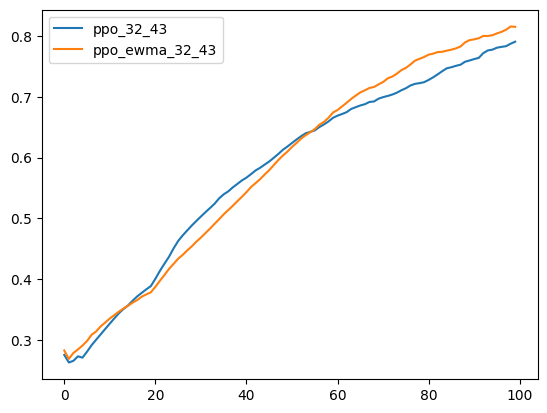

In [38]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

# env_ns = [1, 2, 4, 8, 32]
env_ns = [32]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo", env, scenario, env_n, seed)

        if df is None: continue
        
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)

        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
        if df is None: continue
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        i += 1

Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_1/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_2/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_4/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_8/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_16/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_32/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_64/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_64/seed_43/


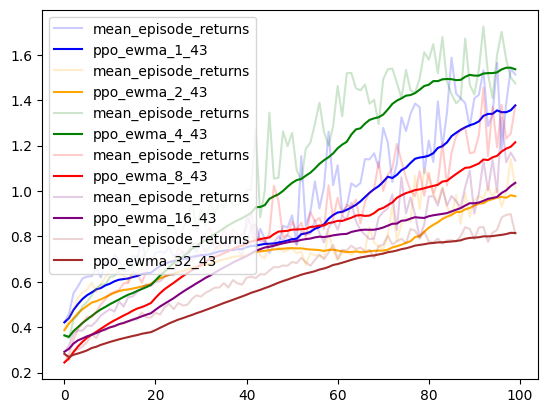

In [30]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32, 64]
seeds = [42, 43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)

        if df is None: continue
        
        df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax, color=colors[i])

        i += 1


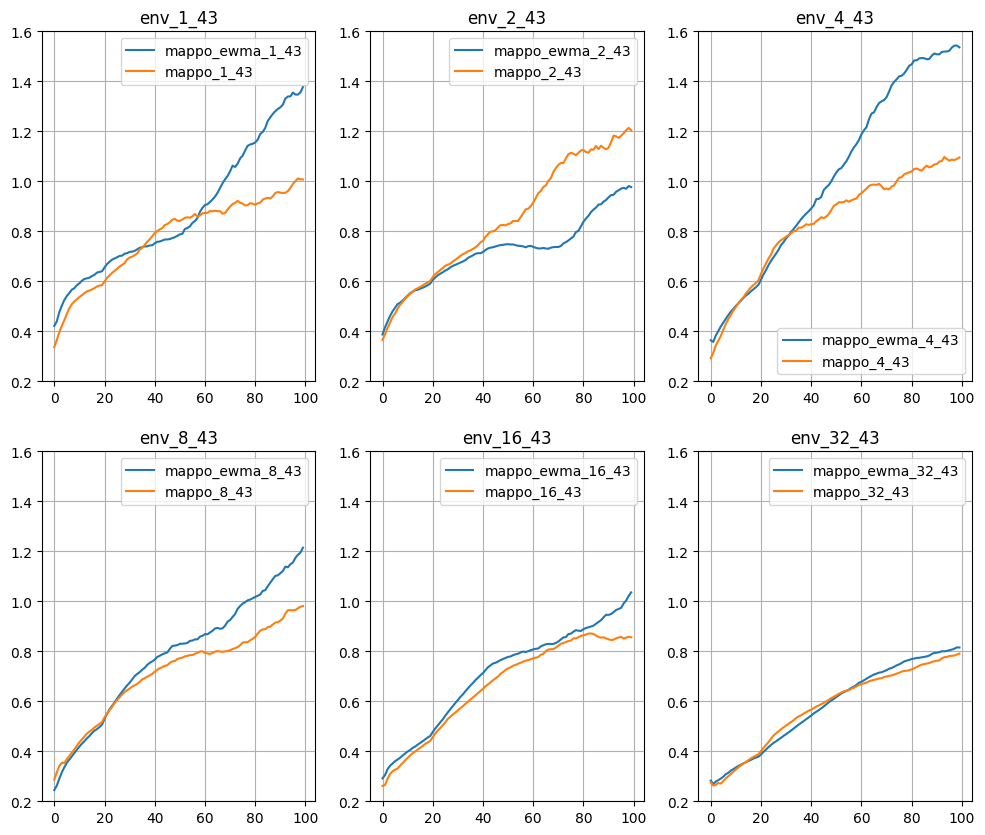

In [27]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# ax = plt.gca()
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 10))

i = 0
for env_n in env_ns:
    for seed in seeds:
        ax = axs[i//3][i%3]
        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
        df.plot(y="rolling_20", label=f"mappo_ewma_{env_n}_{seed}", ax=ax)

        df = read_system_json("ff_mappo", env, scenario, env_n, seed)
        df.plot(y="rolling_20", label=f"mappo_{env_n}_{seed}", ax=ax)

        ax.grid(True)
        ax.set_title(f"env_{env_n}_{seed}")
        ax.set_ylim(0.2, 1.6)


        i += 1